## Bloqueo de Fotojnes no Convencional en una Molécula Fotónica que Contiene un Punto Cuántico

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#### Figura 2

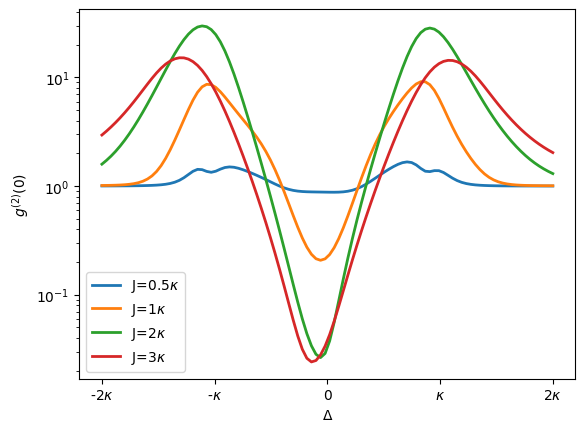

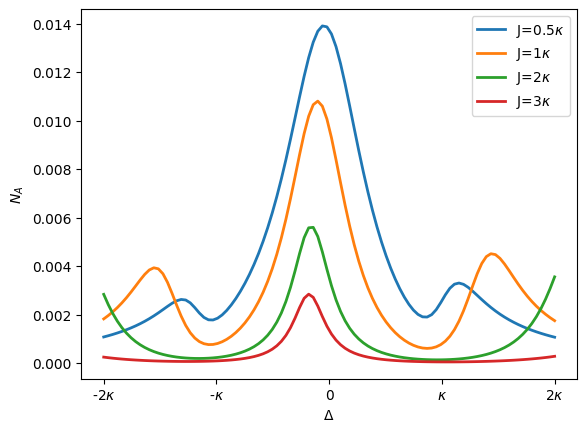

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Na = 3; Nb = 3
Ia = qeye(Na); Ib = qeye(Nb); Is = qeye(2)

a = destroy(Na)          # cavidad A
b = destroy(Nb)          # cavidad B
s = sigmap()             # QD 

def Corre(D, g, J, Ea, Eb, theta, kappa_a, kappa_b, delta, gamma, gamma_phi):
    H = ( D * tensor(a.dag()*a, Ib, Is)                          # cavidad A
        + D * tensor(Ia, b.dag()*b, Is)                          # cavidad B
        + (D + delta) * tensor(Ia, Ib, s.dag()*s)                # QD con desintonía δ
        + g * (tensor(Ia, b, s.dag()) + tensor(Ia, b.dag(), s))  # acoplo QD–B
        + J * (tensor(a.dag(), b, Is) + tensor(a, b.dag(), Is))  # túnel A–B
        + Ea * tensor(a.dag()*np.exp(-1j*theta) + a*np.exp(1j*theta), Ib, Is)
        + Eb * tensor(Ia, b.dag() + b, Is)
    )

    c_ops = [
        np.sqrt(kappa_a) * tensor(a, Ib, Is),  # pérdidas A
        np.sqrt(kappa_b) * tensor(Ia, b, Is),  # pérdidas B
        np.sqrt(gamma)   * tensor(Ia, Ib, s)   # decaimiento QD
   
    ]
    if gamma_phi > 0.0:
        c_ops.append(np.sqrt(gamma_phi) * tensor(Ia, Ib, sigmaz()))  # fonónica ligera

    rho_ss = steadystate(H, c_ops)

    nA  = expect(tensor(a.dag()*a, Ib, Is), rho_ss)
    G2A = expect(tensor(a.dag()*a.dag()*a*a, Ib, Is), rho_ss)
    g2A = G2A/(nA**2) if nA > 1e-12 else 0.0
    return nA, g2A

# Parámetros 
Ea = 2*np.pi
Eb = 0.0
theta = 0.0

kappa = 32*np.pi
g     = kappa
gamma = 2*np.pi

# Imperfecciones
kappa_a = kappa            # pérdidas cavidad A
kappa_b = 0.5*kappa        # pérdidas cavidad B (desbalance)
delta   = 0.2*kappa        # desintonía QD–cavidad B
gamma_phi = 0.05*kappa     # fonónica ligera

# Barridos
D = np.linspace(-2*kappa, 2*kappa, 100)     # detuning Δ
index = [0.5, 1, 2, 3]                      # múltiplos de κ
J_list = [kappa*i for i in index]

L_g2 = []   # Fig. 2a
L_N  = []   # Fig. 2b

for Jval in J_list:
    g2_line, n_line = [], []
    for dDet in D:
        nA, g2 = Corre(dDet, g, Jval, Ea, Eb, theta,
                       kappa_a, kappa_b, delta, gamma, gamma_phi)
        g2_line.append(g2)
        n_line.append(nA)
    L_g2.append(g2_line)
    L_N.append(n_line)

# Fig. 2a
plt.figure()
for i, j in enumerate(L_g2):
    plt.plot(D, j, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\Delta$')
plt.xticks([-2*kappa, -kappa, 0, kappa, 2*kappa],
           [r'-2$\kappa$', r'-$\kappa$', '0', r'$\kappa$', r'2$\kappa$'])
plt.ylabel(r'$g^{(2)}(0)$')
plt.yscale('log')
plt.legend()
plt.show()

# Fig. 2b
plt.figure()
for i, j in enumerate(L_N):
    plt.plot(D, j, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\Delta$')
plt.xticks([-2*kappa, -kappa, 0, kappa, 2*kappa],
           [r'-2$\kappa$', r'-$\kappa$', '0', r'$\kappa$', r'2$\kappa$'])
plt.ylabel(r'$N_A$')
plt.legend()
plt.show()


#### Figura 3

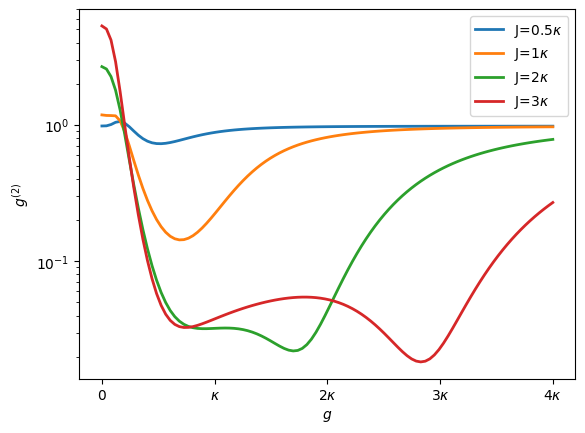

In [25]:
Ea = 2*np.pi
Eb = 0
theta = 0

kappa = 32*np.pi
gamma = 2*np.pi
D = 0

g = np.linspace(0*kappa, 4*kappa, 100)
index = [0.5, 1, 2, 3]
J = [kappa*i for i in index]

L1 = []
for j in J:
  A1 = []
  for i in g:
    val = Corre(D, i, j, Ea, Eb, theta, kappa_a, kappa_b, delta, gamma, gamma_phi)
    A1.append(val[1])
  L1.append(A1)

for i, j in enumerate(L1):
  plt.plot(g, j, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$g$')
plt.xticks([0, kappa, 2*kappa, 3*kappa, 4*kappa], ['0', r'$\kappa$', r'2$\kappa$', r'3$\kappa$', r'4$\kappa$'])
plt.ylabel(r'$g^{(2)}$')
plt.legend()
plt.yscale('log')
plt.show()


#### Figura 4

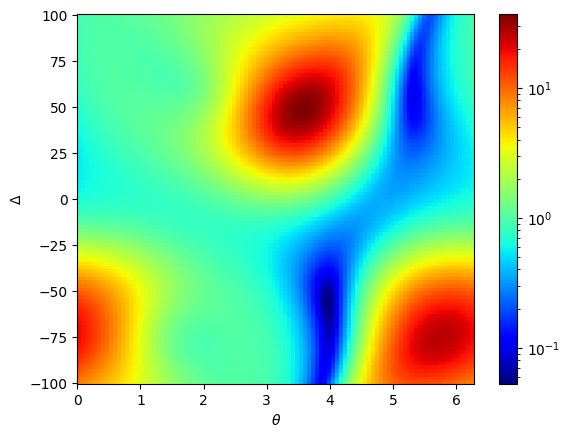

In [26]:
Ea = 2*np.pi
Eb = Ea

kappa = 32*np.pi
g = kappa
gamma = 2*np.pi
J = kappa

kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa

N = 100

D = np.linspace(-kappa, kappa, N)
theta = np.linspace(0, 2*np.pi, N)

L1=np.zeros([N,N])
i = 0
for d in D:
  j = 0
  for t in theta:
    val = Corre(d,g,J,Ea,Eb,t, kappa_a, kappa_b, delta, gamma, gamma_phi)
    L1[-i-1][j] = val[1]
    j+=1
  i+=1

fig, ax = plt.subplots()
norm = mcolors.LogNorm(vmin=np.min(L1[L1 > 0]), vmax=np.max(L1))
img = plt.imshow(L1, cmap = plt.cm.jet, extent=[0,2*np.pi,-kappa,kappa], aspect="auto", norm=norm)
plt.colorbar(img)
plt.ylabel(r'$\Delta$')
plt.xlabel(r'$\theta$')
plt.show()

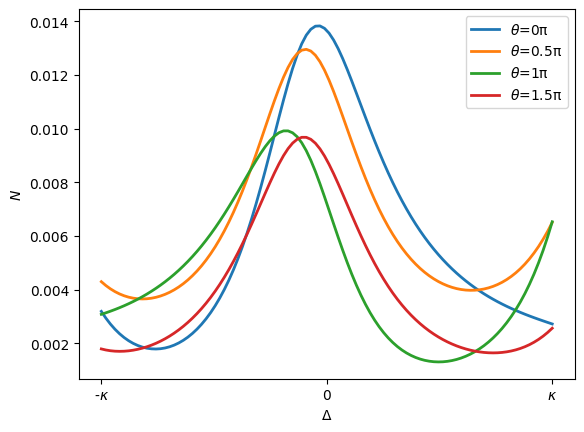

In [27]:
Ea = 2*np.pi
Eb = Ea

kappa = 32*np.pi
g = kappa
gamma = 2*np.pi
J = kappa

kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa

D = np.linspace(-kappa, kappa, 100)
index = [0, 0.5, 1, 1.5]
theta = [np.pi*i for i in index]

L2 = []
for j in theta:
  A2 = []
  for d in D:
    val = Corre(d,g,J,Ea,Eb,j, kappa_a, kappa_b, delta, gamma, gamma_phi)
    A2.append(val[0])
  L2.append(A2)

for i, j in enumerate(L2):
  plt.plot(D, j, label=r'$\theta$='+f'{index[i]}\u03C0', lw=2)

plt.xlabel(r'$\Delta$')
plt.xticks([-kappa, 0, kappa], [r'-$\kappa$', '0', r'$\kappa$'])
plt.ylabel(r'$N$')
plt.legend()
plt.show()

#### Figura 5

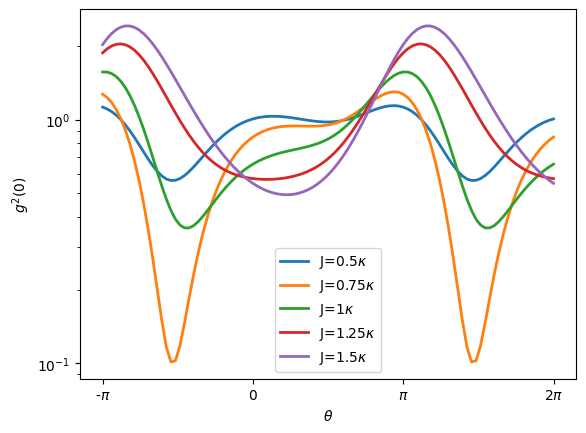

In [29]:
Ea = 2*np.pi
Eb = Ea

kappa = 32*np.pi
g = kappa
gamma = 2*np.pi
D = 0

kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa

theta = np.linspace(-np.pi, 2*np.pi, 100)
index = [0.5, 0.75, 1, 1.25, 1.5]
J = [kappa*i for i in index]

L1 = []
for j in J:
  A1 = []
  for t in theta:
    val = Corre(D,g,j,Ea,Eb,t, kappa_a, kappa_b, delta, gamma, gamma_phi)
    A1.append(val[1])
  L1.append(A1)

for i, j in enumerate(L1):
  plt.plot(theta, j, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\theta$')
plt.xticks([-np.pi, 0, np.pi, 2*np.pi], [r'-$\pi$', '0', r'$\pi$', r'$2\pi$'])
plt.ylabel(r'$g^2(0)$')
plt.yscale('log')
plt.legend()
plt.show()

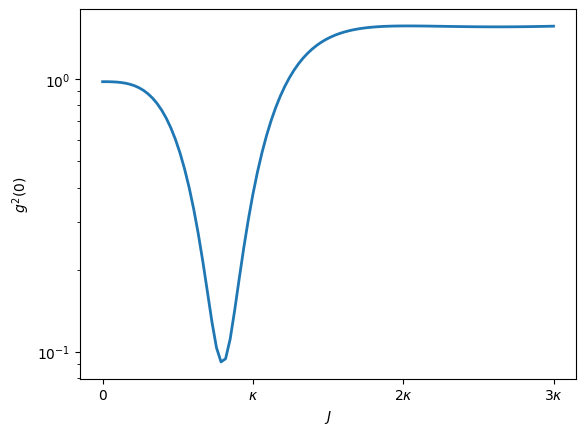

In [30]:
Ea = 2*np.pi
Eb = Ea

kappa = 32*np.pi
g = kappa
gamma = 2*np.pi
D = 0

kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa

theta = 1.5*np.pi
J = np.linspace(0, 3*kappa, 100)

L2 = []
for j in J:
  val = Corre(D,g,j,Ea,Eb,theta, kappa_a, kappa_b, delta, gamma, gamma_phi)
  L2.append(val[1])

plt.plot(J, L2, lw=2)
plt.xlabel(r'$J$')
plt.xticks([0, kappa, 2*kappa, 3*kappa], ['0', r'$\kappa$', r'$2\kappa$', r'$3\kappa$'])
plt.ylabel(r'$g^2(0)$')
plt.yscale('log')
plt.show()

#### Figura 6

In [31]:
Ea = 2*np.pi
Eb = Ea

kappa = 32*np.pi
gamma = 2*np.pi
D = 0
theta = 1.5*np.pi

kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa

N = 100

g = np.linspace(0.001*kappa, 3*kappa, N)
J = np.linspace(0.001*kappa, 3*kappa, N)

L1=np.zeros([N,N])
L2=np.zeros([N,N])

i = 0
for d in g:
  j = 0
  for t in J:
    val = Corre(D,d,t,Ea,Eb,theta, kappa_a, kappa_b, delta, gamma, gamma_phi)
    L1[-i-1][j] = val[1]
    L2[-i-1][j] = val[0]
    j+=1
  i+=1

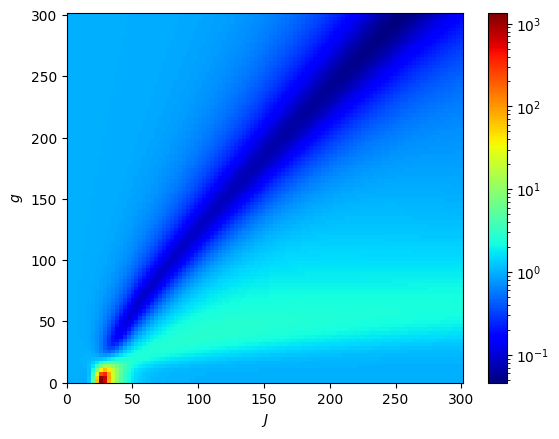

In [32]:
fig, ax = plt.subplots()
norm = mcolors.LogNorm(vmin=np.min(L1[L1 > 0]), vmax=np.max(L1))
img = plt.imshow(L1, cmap = plt.cm.jet, extent=[0,3*kappa,0,3*kappa], aspect="auto", norm=norm)
plt.colorbar(img)
plt.ylabel(r'$g$')
plt.xlabel(r'$J$')
plt.show()

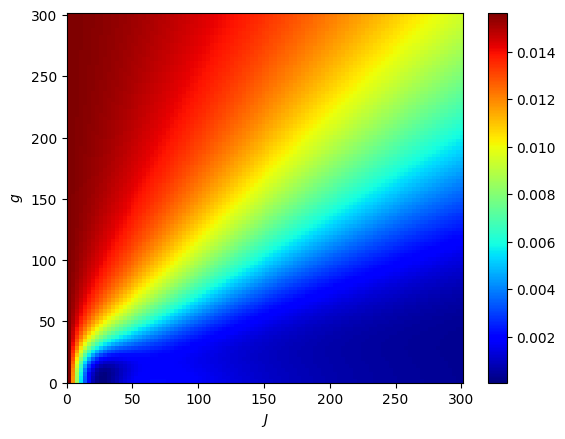

In [33]:
fig, ax = plt.subplots()
img = plt.imshow(L2, cmap = plt.cm.jet, extent=[0,3*kappa,0,3*kappa], aspect="auto")
plt.colorbar(img)
plt.ylabel(r'$g$')
plt.xlabel(r'$J$')
plt.show()

#### Figura 7

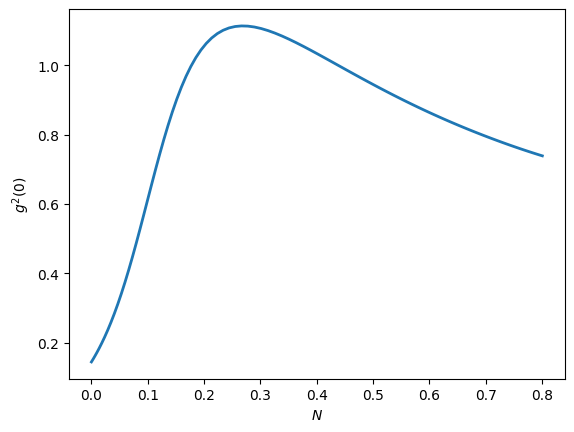

In [34]:
theta = 1.5*np.pi
kappa = 32*np.pi
gamma = 2*np.pi
D = 0
g = kappa
J = 0.9*kappa

kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa

Ea = np.linspace(0.01*np.pi, 40*np.pi, 100)

A3 = []
A4 = []
for i in Ea:
  val = Corre(D,g,J,i,i,theta, kappa_a, kappa_b, delta, gamma, gamma_phi)
  A3.append(val[1])
  A4.append(val[0])

plt.plot(A4, A3, lw=2)
plt.xlabel(r'$N$')
plt.ylabel(r'$g^2(0)$')
plt.show()

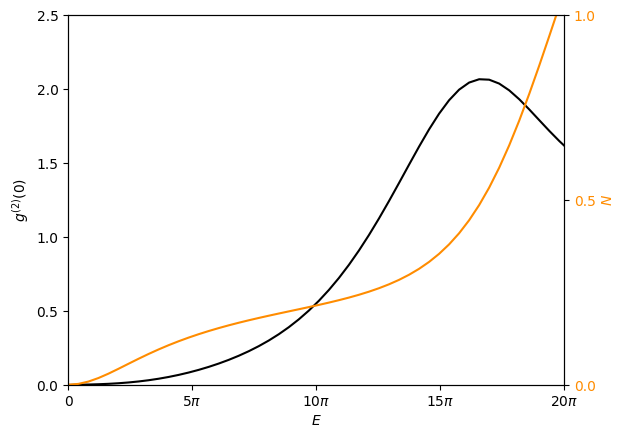

In [32]:
Ia = qeye(6)
Ib = qeye(6)
Is = qeye(2)

a = destroy(6)
b = destroy(6)
s = sigmap()

A = tensor(a, Ib, Is)

def Corre(D,g,J,Ea,Eb,theta):
  H = (D * tensor(a.dag() * a, Ib, Is)
      + D * tensor(Ia, b.dag() * b, Is)
      + D * tensor(Ia, Ib, s.dag() * s)
      + g * (tensor(Ia, b, s.dag()) + tensor(Ia, b.dag(), s))
      + J * (tensor(a.dag(), b, Is) + tensor(a, b.dag(), Is))
      + Ea * tensor((a.dag() * np.exp(-1j*theta) + a * np.exp(1j*theta)), Ib, Is)
      + Eb * tensor(Ia, (b.dag() + b), Is))

  ops = [np.sqrt(kappa)*tensor(a,Ib,Is),
        np.sqrt(kappa)*tensor(Ia,b,Is),
        np.sqrt(gamma)*tensor(Ia,Ib,s)]

  rho_ss = steadystate(H, ops)
  n_ss = expect(tensor(a.dag() * a, Ib, Is), rho_ss)

  G2 = expect(tensor(a.dag() * a.dag() * a * a, Ib, Is), rho_ss)
  g2 = G2 / (n_ss ** 2)
  return (n_ss,g2)

theta = 1.5*np.pi
kappa = 16*np.pi
gamma = 1*np.pi
D = 0
g = kappa
J = 0.9*kappa

Ea = np.linspace(0.01*np.pi, 40*np.pi, 100)

A1 = []
A2 = []
for i in Ea:
  val = Corre(D,g,J,i,i,theta)
  A1.append(val[1])
  A2.append(val[0])


fig, ax1 = plt.subplots()
ax1.set_xlabel(r'$E$')
ax1.set_xlim(0, 20*np.pi)
ax1.set_xticks(np.arange(0, 21*np.pi, 5*np.pi))
ax1.set_xticklabels(['0', r'$5\pi$', r'$10\pi$', r'$15\pi$', r'$20\pi$'])

ax1.set_ylabel(r'$g^{(2)}(0)$', color='black')
ax1.plot(Ea, A1, 'k-', label=r'$g^{(2)}(0)$')
ax1.set_yticks(np.arange(0, 2.6, 0.5))
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 2.5)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$N$', color='darkorange')
ax2.plot(Ea, A2, color='darkorange', label=r'$N$')
ax2.set_yticks([0, 0.5, 1.0])
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(0, 1.0)

plt.show()

In [ ]:
# --- Sube la dimensión a 6 (y deja todo lo demás igual) ---
Ia = qeye(6); Ib = qeye(6); Is = qeye(2)
a = destroy(6); b = destroy(6); s = sigmap()

A = tensor(a, Ib, Is)

def Corre(D,g,J,Ea,Eb,theta):
  H = (D * tensor(a.dag() * a, Ib, Is)
      + D * tensor(Ia, b.dag() * b, Is)
      # 🔧 CAMBIO 1: desintonía del QD
      + (D + delta) * tensor(Ia, Ib, s.dag() * s)
      + g * (tensor(Ia, b, s.dag()) + tensor(Ia, b.dag(), s))
      + J * (tensor(a.dag(), b, Is) + tensor(a, b.dag(), Is))
      + Ea * tensor((a.dag() * np.exp(-1j*theta) + a * np.exp(1j*theta)), Ib, Is)
      + Eb * tensor(Ia, (b.dag() + b), Is))

  # 🔧 CAMBIO 2: desbalance de pérdidas (+ dephasing opcional)
  ops = [np.sqrt(kappa_a)*tensor(a,Ib,Is),
         np.sqrt(kappa_b)*tensor(Ia,b,Is),
         np.sqrt(gamma)*tensor(Ia,Ib,s)]
  if gamma_phi > 0.0:
      ops.append(np.sqrt(gamma_phi)*tensor(Ia,Ib,sigmaz()))

  rho_ss = steadystate(H, ops)
  n_ss = expect(tensor(a.dag() * a, Ib, Is), rho_ss)

  G2 = expect(tensor(a.dag() * a.dag() * a * a, Ib, Is), rho_ss)
  g2 = G2 / (n_ss ** 2) if n_ss > 1e-12 else 0.0
  return (n_ss,g2)

# --- PARÁMETROS (idénticos a tu script salvo los nuevos realistas) ---
Eb = 0
theta = 0
kappa = 16*np.pi
gamma = 1*np.pi
D = 0
g = 1.1*kappa
J = 3*kappa

# 🔧 NUEVOS PARÁMETROS REALISTAS (elige valores, estos son ejemplo coherentes con Fig. 2)
kappa_a = kappa
kappa_b = 0.5*kappa
delta   = 0.2*kappa
gamma_phi = 0.05*kappa   # p.ej. 0.05*kappa si quieres activar fonónica ligera

Ea = np.linspace(0.001*kappa, 3*kappa, 100)

A2 = []
A3 = []
for i in Ea:
  val = Corre(D,g,J,i,Eb,theta)
  A2.append(val[1])
  A3.append(val[0])

fig, ax1 = plt.subplots()
ax1.set_xlabel(r'$E/\kappa$')
ax1.set_ylabel(r'$g^{(2)}(0)$', color='black')
# (opcional) usar E/kappa en el eje x:
ax1.plot(Ea/kappa, A2, 'k-', label=r'$g^{(2)}(0)$')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks([0, 1, 2, 3], ['0', r'$\kappa$', r'2$\kappa$', r'3$\kappa$'])

ax2 = ax1.twinx()
ax2.set_ylabel(r'$N$', color='darkorange')
ax2.plot(Ea/kappa, A3, color='darkorange', label=r'$N$')
ax2.tick_params(axis='y', labelcolor='darkorange')
# (opcional) estos ticks asumen el rango del paper; ajusta si cambias E o pérdidas:
# ax2.set_yticks([0, 0.05, 0.10, 0.15, 0.20], ['0', '0.05', '0.10', '0.15', '0.20'])

plt.title(r'Fig. 3b (realista): $N_a=N_b=6$, $\kappa_a\neq\kappa_b$, $\delta\neq 0$' + (r', $\gamma_\phi>0$' if gamma_phi>0 else ''))
plt.show()
